# Desafio 9: Descubra quem fez o ENEM 2016 apenas para treino.

Importando as Bibliotecas.

In [66]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import seaborn as sns

Lendo os dados de treino e teste.

In [67]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [68]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [69]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


Selecionando as features dos dados de teste e adicionando a de treineiros.

In [70]:
columns = list(df_test.columns)
columns.append('IN_TREINEIRO')

Reduzindo o número de features dos dados de treino para o tamanho das do dado de teste.

In [71]:
df_train = df_train[columns]
df_train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

In [72]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

Selecionando apenas as features numéricas.

In [73]:
df_train_numeric = df_train.select_dtypes(include=['float64','int64'])
df_test_numeric = df_test.select_dtypes(include=['float64','int64'])

# Dados Desbalanceados

Vamos agora na feature 'IN_TREINEIRO' observar se os dados estão balanceados ou não.

In [74]:
df_train_numeric.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

Os dados estão desbalanceados, devemos então balanceá-los. \
Primeiro vamos tratar os dados, contando a quantidade de valores nulos.

In [75]:
df_train_numeric.isnull().sum()
df_test_numeric.isnull().sum()

CO_UF_RESIDENCIA             0
NU_IDADE                     0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3144
TP_DEPENDENCIA_ADM_ESC    3144
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                1112
NU_NOTA_CH                1112
NU_NOTA_LC                1170
TP_LINGUA                    0
TP_STATUS_REDACAO         1170
NU_NOTA_COMP1             1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_COMP4             1170
NU_NOTA_COMP5             1170
NU_NOTA_REDACAO           1170
dtype: i

Trocando os valores nulos por 0.

In [76]:
df_train_numeric = df_train_numeric.replace(np.NAN, 0)
df_train_numeric.isnull().sum()

CO_UF_RESIDENCIA          0
NU_IDADE                  0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
IN_TREINEIRO              0
dtype: int64

Fazendo mesma coisa para os dados de teste.

In [77]:
df_test_numeric = df_test_numeric.replace(np.NAN, 0)
df_test_numeric.isnull().sum()

CO_UF_RESIDENCIA          0
NU_IDADE                  0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
dtype: int64

Contando o número de Zeros nos dados.

In [78]:
(df_train_numeric == 0).sum()

CO_UF_RESIDENCIA              0
NU_IDADE                      0
TP_COR_RACA                 241
TP_NACIONALIDADE             13
TP_ST_CONCLUSAO               0
TP_ANO_CONCLUIU            7206
TP_ESCOLA                     0
TP_ENSINO                  9448
TP_DEPENDENCIA_ADM_ESC     9448
IN_BAIXA_VISAO            13713
IN_CEGUEIRA               13730
IN_SURDEZ                 13725
IN_DISLEXIA               13729
IN_DISCALCULIA            13729
IN_SABATISTA              13597
IN_GESTANTE               13717
IN_IDOSO                  13728
TP_PRESENCA_CN             3380
TP_PRESENCA_CH             3380
TP_PRESENCA_LC             3592
TP_PRESENCA_MT             3592
NU_NOTA_CN                 3396
NU_NOTA_CH                 3392
NU_NOTA_LC                 3604
TP_LINGUA                  5579
TP_STATUS_REDACAO          3597
NU_NOTA_COMP1              3839
NU_NOTA_COMP2              3838
NU_NOTA_COMP3              3853
NU_NOTA_COMP4              3852
NU_NOTA_COMP5              4290
NU_NOTA_

In [79]:
(df_test_numeric == 0).sum()

CO_UF_RESIDENCIA             0
NU_IDADE                     0
TP_COR_RACA                 81
TP_NACIONALIDADE             2
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU           2372
TP_ESCOLA                    0
TP_ENSINO                 3144
TP_DEPENDENCIA_ADM_ESC    3144
IN_BAIXA_VISAO            4560
IN_CEGUEIRA               4569
IN_SURDEZ                 4570
IN_DISLEXIA               4569
IN_DISCALCULIA            4570
IN_SABATISTA              4529
IN_GESTANTE               4566
IN_IDOSO                  4569
TP_PRESENCA_CN            1112
TP_PRESENCA_CH            1112
TP_PRESENCA_LC            1165
TP_PRESENCA_MT            1165
NU_NOTA_CN                1114
NU_NOTA_CH                1113
NU_NOTA_LC                1174
TP_LINGUA                 1786
TP_STATUS_REDACAO         1170
NU_NOTA_COMP1             1242
NU_NOTA_COMP2             1241
NU_NOTA_COMP3             1244
NU_NOTA_COMP4             1245
NU_NOTA_COMP5             1407
NU_NOTA_REDACAO           1241
dtype: i

In [80]:
df_test_numeric

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,43,19,1,1,1,3,1,0.0,0.0,0,...,593.3,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,24,3,2,1,4,1,0.0,0.0,0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,16,2,1,3,0,1,0.0,0.0,0,...,529.3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,17,1,1,2,0,2,1.0,2.0,0,...,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0
4,53,19,1,1,1,1,1,0.0,0.0,0,...,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,31,17,2,1,2,0,3,1.0,4.0,0,...,569.7,501.4,1,1.0,140.0,120.0,120.0,120.0,120.0,620.0
4566,35,20,1,1,1,2,1,0.0,0.0,0,...,432.9,457.0,1,1.0,100.0,60.0,60.0,80.0,20.0,320.0
4567,11,22,3,1,1,5,1,0.0,0.0,0,...,570.3,563.8,1,1.0,120.0,120.0,100.0,100.0,60.0,500.0
4568,35,19,1,1,2,0,2,1.0,2.0,0,...,586.1,559.3,0,1.0,120.0,100.0,100.0,120.0,80.0,520.0


Selecionando as features que farão parte dos dados de treino e teste.

In [81]:
x_train = df_train_numeric.drop(["IN_TREINEIRO"], axis=1)
y_train = df_train_numeric['IN_TREINEIRO']
x_test = df_test_numeric

# Aplicando o PCA

In [82]:
# Contando o número de colunas
x_train.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,43,24,1,1,1,4,1,0.0,0.0,0,...,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,23,17,3,1,2,0,2,1.0,2.0,0,...,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,23,21,3,1,3,0,1,0.0,0.0,0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,25,0,1,1,9,1,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,28,2,1,1,4,1,0.0,0.0,0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para visualizar os dados, que estão em $\mathbb{R}^{32}$, utilizamos PCA e os transformamos para $\mathbb{R}^{2}$:

In [83]:
pca = PCA(n_components=2)

pca.fit(x_train)

imbalanced_pca = pca.transform(x_train)

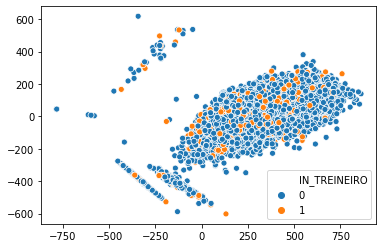

In [84]:
# Visualizando o resultado 
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=y_train);

Podemos ver claramente, a maioria dos inscritos no enem como sendo não treineiros(0).

# Smote

Utilizaremos o SMOTE (do pacote `imblearn`), que é uma técnica de oversampling para reamostrar os dados  e assim balancear o _data set.

In [85]:
# Aplicando a técnica
smote = SMOTE(sampling_strategy="minority")

x_smote, y_smote = smote.fit_resample(x_train, y_train)

imbalanced_pca_smote = pca.transform(x_smote)

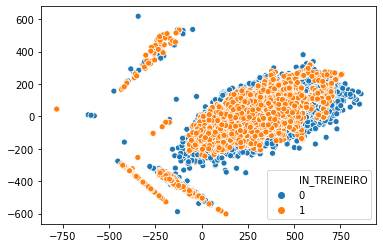

In [86]:
# Visualizando a técnica
sns.scatterplot(x=imbalanced_pca_smote[:, 0], y=imbalanced_pca_smote[:, 1], hue=y_smote);

In [87]:
#Conferindo se está balanceado
y_smote.value_counts(dropna=False)

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

Com os dados balanceados, vamos agora aplicar modelos de classificação e ver qual deles é mais eficiente.

# Regressão Logística

A Regressão Logística é bastante empregada em modelos de classificação binária.

In [88]:
# Implementando o Modelo
logistic = LogisticRegression()

logistic.fit(x_smote, y_smote)

/home/iagoprior/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [89]:
# Prevendo o modelo obtido.
pred_1 = logistic.predict(x_test)

Com o modelo de Regressão Linear, o score foi de 95,754923 % .

# Random Forest

Modelo baseado em Árvores de Decisão, com grande precisão.

In [90]:
# Aplicando o modelo
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(x_smote, y_smote)

RandomForestClassifier(n_estimators=500)

In [91]:
# Prevendo usando o modelo
pred_2 = random_forest.predict(x_test)

Com o modelo de Random Forest, o score foi de 99,628009 % .

## $k$ _Nearest Neighbors_

O método kNN é bastante simples e muito poderoso em resultados. Ao contrário da regressão logística, que é um método paramétrico, o kNN não utiliza nenhuma suposição sobre a distribuição das classes, sendo portanto um método __não__ paramétrico. O kNN atribui a um ponto $X$ de teste a classe majoritária entre os $k$ pontos do conjunto de treinamento mais próximos a $X$. A proximidade aqui é geralmente medida em termos de distância Euclideana, mas outras métricas também são possíveis.


In [92]:
# Aplicando o modelo
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_smote, y_smote)

KNeighborsClassifier(n_neighbors=7)

In [96]:
# Prevendo usando o modelo
pred_3 = knn.predict(x_test)

Utilizando o knn, o score foi de 99,606127 %.

In [97]:
df_resposta = pd.DataFrame()
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_resposta

,NU_INSCRICAO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897
1,177f281c68fa032aedbd842a745da68490926cd2
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334
3,5c356d810fa57671402502cd0933e5601a2ebf1e
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3
...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1
4567,3f1c3388244df8d6521e983a809292d9f3bca643
4568,1778e9c4cef591beb6b986d191d15ed05de816b0


In [98]:
df_resposta['IN_TREINEIRO'] = pred_3
df_resposta

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,1
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,1
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,1
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,1
4567,3f1c3388244df8d6521e983a809292d9f3bca643,1
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,1


In [95]:
df_resposta.to_csv('answer.csv', index=False, header=True)